## **Calculation of descriptive statistics of the freshwater lens (FWL)**

> **Calculate statistics based on the three methods for estimating the depth of the FWL**

1. **Method 1:** _Intuitive Criterion_ **(IC)**  
2. **Method 2:** _Optimal BIC_ **(BIC)**  
3. **Method 3:** _Dupuit-Ghyben-Herzberg_ **(DGH)**
4. **Method 4:** _Land Resource Survey Threshold_ **(LRST)**

---

### Import Libraries

In [1]:
import sys
import os

root = os.path.abspath('../..')  
sys.path.append(root)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import modules.statistics_fwl_estimation as st_fwl

from modules import processing, load, plots, analysis

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 25)

---

### Load data

In [2]:
df_fwl_estimation = pd.read_csv(f'{root}/data/selection_fwl_ic_bic_dgh.csv')
df_fwl_estimation.rename(columns={'vp_fwl_ic': 'vp_ic', 
                                 'vp_fwl_bic': 'vp_bic', 
                                 'vp_fwl_dgh': 'vp_dgh',
                                 'vp_fwl_lrst': 'vp_lrst'}, inplace=True)
df_fwl_estimation = df_fwl_estimation[['ID', 'vp_ic', 'vp_bic', 'vp_dgh', 'vp_lrst']]

df_fwl_estimation

,ID,vp_ic,vp_bic,vp_dgh,vp_lrst
0,AW1D_YSI_20230826,16.317073,17.169116,16.386594,6.120
1,AW2D_YSI_20230815,9.563224,9.907636,11.319882,13.103
2,AW5D_YSI_20230824,14.134225,13.652858,12.090368,12.580
3,AW6D_YSI_20230815,13.216555,13.561559,13.844801,13.016
4,AW7D_YSI_20230814,13.290227,13.290227,13.316418,12.881
5,BW1D_YSI_20230824,14.125652,14.125652,14.117028,NaN
6,BW2D_YSI_20230819,13.997452,13.997452,14.581115,14.038
7,BW3D_YSI_20230818,11.701564,11.701564,12.974280,10.784
8,BW4D_YSI_20230816,14.358411,14.358411,14.124974,14.014
9,BW5D_YSI_20230822,12.393402,11.527182,10.262300,NaN


In [3]:
df_fwl_estimation

,ID,vp_ic,vp_bic,vp_dgh,vp_lrst
0,AW1D_YSI_20230826,16.317073,17.169116,16.386594,6.120
1,AW2D_YSI_20230815,9.563224,9.907636,11.319882,13.103
2,AW5D_YSI_20230824,14.134225,13.652858,12.090368,12.580
3,AW6D_YSI_20230815,13.216555,13.561559,13.844801,13.016
4,AW7D_YSI_20230814,13.290227,13.290227,13.316418,12.881
5,BW1D_YSI_20230824,14.125652,14.125652,14.117028,NaN
6,BW2D_YSI_20230819,13.997452,13.997452,14.581115,14.038
7,BW3D_YSI_20230818,11.701564,11.701564,12.974280,10.784
8,BW4D_YSI_20230816,14.358411,14.358411,14.124974,14.014
9,BW5D_YSI_20230822,12.393402,11.527182,10.262300,NaN


---

### **Filter profiles by vertical position for each method**

In [4]:
filtered_data = st_fwl.load_and_filter_data(df_fwl_estimation, 
                                            data_path=f'{root}/data/rawdy'
                                            )

filtered_data

{'AW1D_YSI_20230826': {'IC':       Vertical Position [m]  Corrected sp Cond [uS/cm]
  0                     0.001                    1304.60
  1                     0.004                    1302.00
  2                     0.006                    1303.50
  3                     0.007                    1303.50
  4                     0.008                    1304.30
  ...                     ...                        ...
  3048                 16.295                    2002.90
  3049                 16.296                    2002.10
  3050                 16.304                    2003.85
  3051                 16.307                    2003.70
  3052                 16.313                    2004.80
  
  [3053 rows x 2 columns],
  'BIC':       Vertical Position [m]  Corrected sp Cond [uS/cm]
  0                     0.001                     1304.6
  1                     0.004                     1302.0
  2                     0.006                     1303.5
  3                     

---

### **Statistics**

In [5]:
df_stats = st_fwl.compute_statistics(filtered_data, 
                                    df_fwl_estimation, 
                                    "Corrected sp Cond [uS/cm]"
                                     )

df_stats

,id,method,fwl_thickness,mean,std,cv,min,max,median,25%,50%,75%,iqr,count,outliers
0,AW1D_YSI_20230826,IC,16.317073,1575.951416,120.598105,0.076524,1302.000000,2004.800,1525.150000,1515.600000,1525.150000,1605.90000,90.300000,3053,269
1,AW1D_YSI_20230826,BIC,17.169116,1648.868238,354.147610,0.214782,1302.000000,3793.700,1530.200000,1515.800000,1530.200000,1660.40000,144.600000,3228,296
2,AW1D_YSI_20230826,DGH,16.386594,1577.652161,123.382048,0.078206,1302.000000,2015.700,1525.500000,1515.600000,1525.500000,1608.00000,92.400000,3065,258
3,AW1D_YSI_20230826,LRST,6.120000,1499.502358,62.290622,0.041541,1302.000000,1568.925,1496.700000,1452.300000,1496.700000,1558.70000,106.400000,749,0
4,AW2D_YSI_20230815,IC,9.563224,425.690598,25.702609,0.060379,389.000000,478.150,424.850000,404.250000,424.850000,449.20000,44.950000,585,0
5,AW2D_YSI_20230815,BIC,9.907636,428.632290,30.027030,0.070053,389.000000,562.500,425.600000,405.125000,425.600000,450.65000,45.525000,607,6
6,AW2D_YSI_20230815,DGH,11.319882,461.085426,96.072738,0.208362,389.000000,884.200,434.200000,407.350000,434.200000,459.15000,51.800000,693,92
7,AW2D_YSI_20230815,LRST,13.103000,538.745844,225.549184,0.418656,389.000000,1382.000,444.600000,410.300000,444.600000,489.65000,79.350000,794,169
8,AW5D_YSI_20230824,IC,14.134225,940.906805,334.346803,0.355345,685.100000,1924.400,756.950000,708.200000,756.950000,1009.97500,301.775000,2046,272
9,AW5D_YSI_20230824,BIC,13.652858,891.037775,271.087404,0.304238,685.100000,1704.900,753.000000,707.700000,753.000000,998.62500,290.925000,1932,173


##### Save stats

In [6]:
df_stats.to_csv(f'{root}/data/statistics_profiles_methods.csv', 
                index=False)

---

### **Boxplots**

In [7]:
# Only base name
order_plot = [
    "LRS70D_YSI_20230822", # Last
    "BW9D_YSI_20230823", 
    "BW11D_YSI_20230823",
    "BW8D_YSI_20230823",
    "LRS81D_YSI_20230823",
    "BW1D_YSI_20230824",
    "LRS79D_YSI_20230827",
    "AW1D_YSI_20230826",
    "LRS90D_YSI_20230827",
    "AW2D_YSI_20230815",
    "AW5D_YSI_20230824",
    "BW2D_YSI_20230819",
    "LRS75D_YSI_20230819",
    "LRS89D_YSI_20230825",
    'LRS65D_YSI_20220812',
    "AW7D_YSI_20230814",
    "AW6D_YSI_20230815",
    "BW3D_YSI_20230818",
    "BW10D_YSI_20230825",
    "BW6D_YSI_20230826",
    "BW4D_YSI_20230816",
    "LRS69D_YSI_20230818",
    "LRS33D_YSI_20230822",
    "BW7D_YSI_20230826",
    "BW5D_YSI_20230822" # First
]

> All possible combinations for methods_to_show parameter:
- ['DGH']
- ['IC'] 
- ['BIC']
- ['LRST']
- ['DGH', 'IC']
- ['DGH', 'BIC']
- ['DGH', 'LRST']
- ['IC', 'BIC']
- ['IC', 'LRST']
- ['BIC', 'LRST']
- ['DGH', 'IC', 'BIC']
- ['DGH', 'IC', 'LRST']
- ['DGH', 'BIC', 'LRST']
- ['IC', 'BIC', 'LRST']
- ['DGH', 'IC', 'BIC', 'LRST']

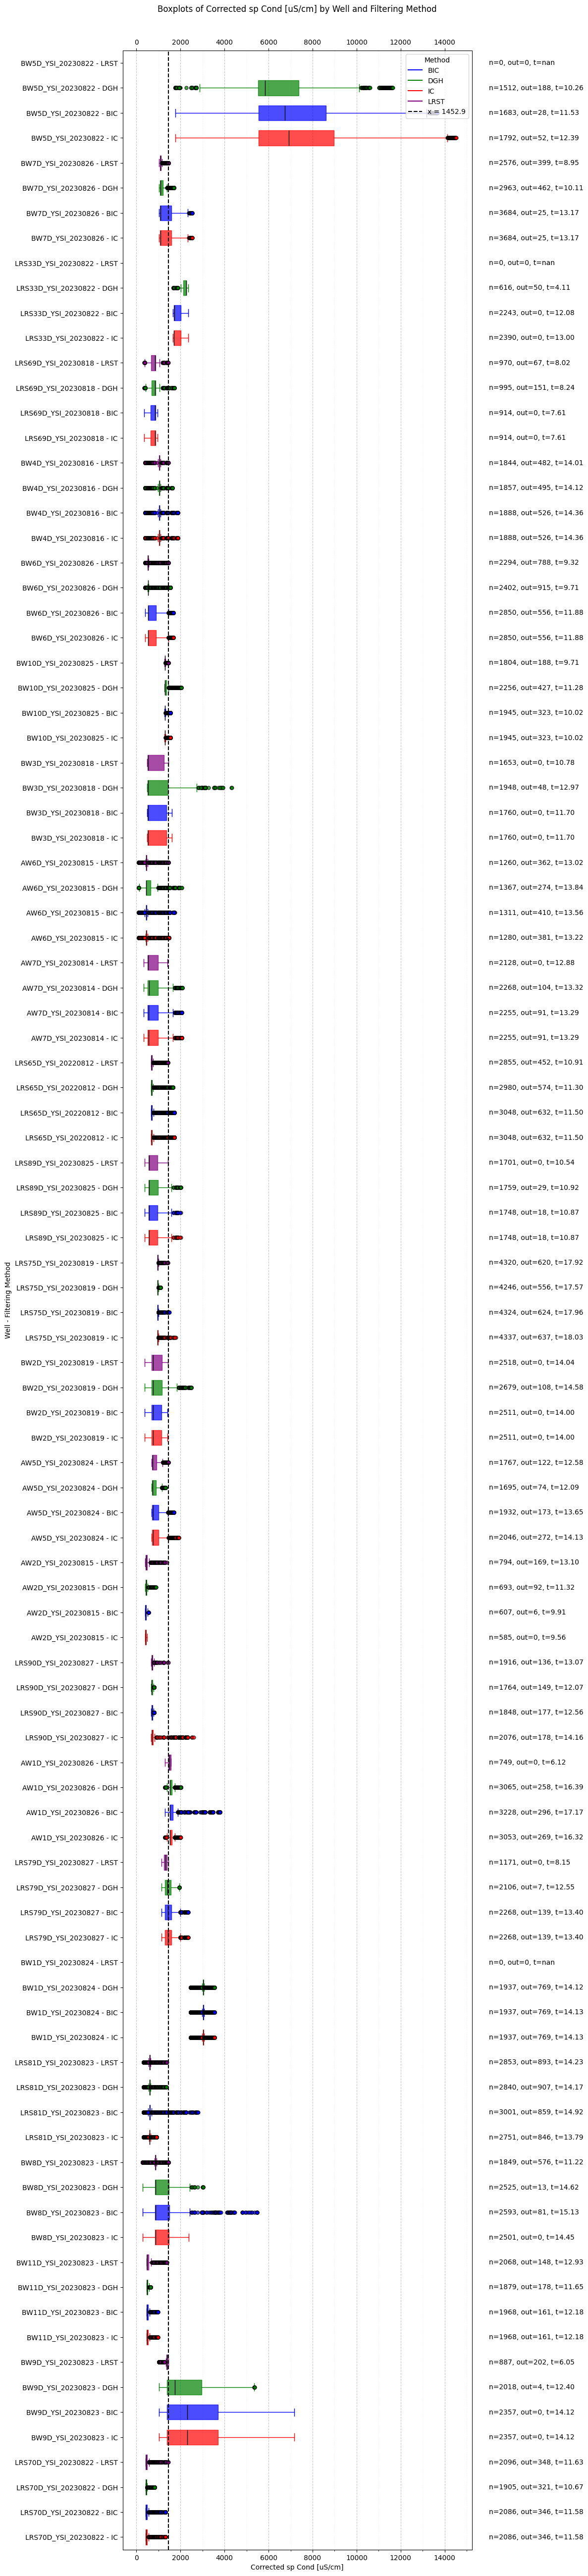

In [8]:
fig = st_fwl.generate_boxplots_matplotlib(filtered_data, 
                        variable="Corrected sp Cond [uS/cm]", 
                        file_info_df=df_fwl_estimation,
                        show_outliers=True,
                        order= order_plot, 
                        legend_x=1.0,
                        legend_y=1.0,
                        mirror_top_axis=True,
                        enable_minor_ticks=True,
                        draw_vertical_line=True,
                        # Capital letters only
                        methods_to_show = ['DGH', 'IC', 'BIC', 'LRST'] 
                        )